In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [24]:
col_names = ['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Label']
diab = pd.read_csv("C:/Users/user/Desktop/Sneha's Program/ML Datasets/diabetes.csv", header = None, names= col_names)
diab.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [25]:
diab.info

<bound method DataFrame.info of      Pregnant  Glucose  BP  Skin  Insulin   BMI  Pedigree  Age  \
0           6      148  72    35        0  33.6     0.627   50   
1           1       85  66    29        0  26.6     0.351   31   
2           8      183  64     0        0  23.3     0.672   32   
3           1       89  66    23       94  28.1     0.167   21   
4           0      137  40    35      168  43.1     2.288   33   
..        ...      ...  ..   ...      ...   ...       ...  ...   
763        10      101  76    48      180  32.9     0.171   63   
764         2      122  70    27        0  36.8     0.340   27   
765         5      121  72    23      112  26.2     0.245   30   
766         1      126  60     0        0  30.1     0.349   47   
767         1       93  70    31        0  30.4     0.315   23   

               Label  
0    tested_positive  
1    tested_negative  
2    tested_positive  
3    tested_negative  
4    tested_positive  
..               ...  
763  tested_ne

In [26]:
feat_cols = ['Pregnant', 'Glucose', 'BP', 'Insulin', 'BMI', 'Pedigree', 'Age']
x = diab[feat_cols]
y = diab.Label

In [27]:
x.head()

,Pregnant,Glucose,BP,Insulin,BMI,Pedigree,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [29]:
dt1 = DecisionTreeClassifier()
dt1.fit(x_train, y_train)

y_pred = dt1.predict(x_test)

In [30]:
print("Accuracy  :  ", metrics.accuracy_score(y_test,y_pred))

Accuracy  :   0.6623376623376623


[Text(0.4158088235294118, 0.96875, 'x[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.15551470588235294, 0.90625, 'x[4] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.047058823529411764, 0.84375, 'x[4] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.023529411764705882, 0.78125, 'x[0] <= 7.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.011764705882352941, 0.71875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.03529411764705882, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07058823529411765, 0.78125, 'x[5] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.058823529411764705, 0.71875, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.08235294117647059, 0.71875, 'x[5] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.07058823529411765, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09411764705882353, 0.65625, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),


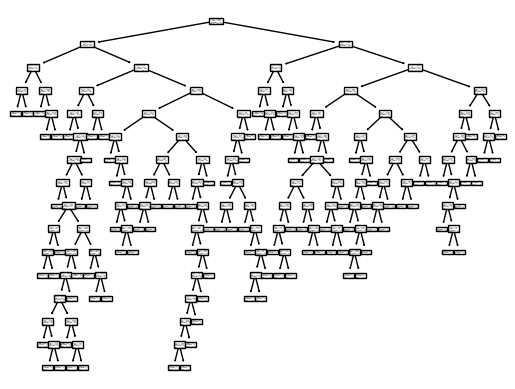

In [32]:
from sklearn import tree
tree.plot_tree(dt1)

In [33]:
dt2 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
dt2=dt2.fit(x_train, y_train)

y_pred = dt2.predict(x_test)

[Text(0.5, 0.875, 'x[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.25, 0.625, 'x[4] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.125, 0.375, 'x[4] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.0625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.125, 'gini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.375, 0.375, 'x[6] <= 27.5\ngini = 0.397\nsamples = 260\nvalue = [189, 71]'),
 Text(0.3125, 0.125, 'gini = 0.243\nsamples = 120\nvalue = [103, 17]'),
 Text(0.4375, 0.125, 'gini = 0.474\nsamples = 140\nvalue = [86, 54]'),
 Text(0.75, 0.625, 'x[4] <= 27.85\ngini = 0.478\nsamples = 180\nvalue = [71, 109]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(0.5625, 0.125, 'gini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.875, 0.375, 'x[1] <= 158.5\ngini = 0.424\nsamples = 144\nvalue = [44, 100]')

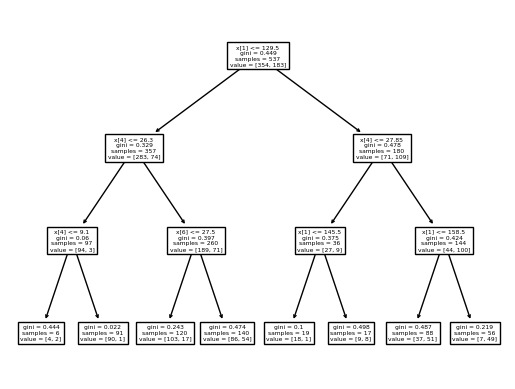

In [34]:
tree.plot_tree(dt2)